In [36]:
from imports import *
import avg_clf_train
import import_data

%matplotlib inline

---

In [37]:
check = True

if check == True:
    # check if last day's data is available
    print Quandl.get("YAHOO/HALO", authtoken='DVhizWXNTePyzzy1eHWR').tail(1)

            Open       High    Low  Close   Volume  Adjusted Close
Date                                                              
2015-08-20  18.4  18.860001  17.16  17.18  1594500           17.18


---

In [38]:
download = True

start_tickers = ticker_list.tickers
tickers = []

print len(start_tickers), "total tickers to start\n"

if download == True:
    # download data
    for ticker in start_tickers:
        try:
            stock_df = Quandl.get("YAHOO/{}".format(ticker), authtoken='DVhizWXNTePyzzy1eHWR')
            stock_df.to_csv("quandl_data/{}.csv".format(ticker), index=False)
            tickers.append(ticker)
        except:
            print "removed:", ticker
            
elif download == False:
    tickers = [filename[:-4] for filename in os.listdir('quandl_data')]
            
print "\n", len(tickers), "available tickers:"
print tickers

97 total tickers to start

removed: AAVL
removed: APTO
removed: ATRA
removed: BLFS
removed: CAPN
removed: CASI
removed: CDTX
removed: CGNT
removed: CHRS
removed: CLLS
removed: DBVT
removed: EDAP
removed: GENE
removed: INCR
removed: JUNO
removed: KITE
removed: LOXO
removed: TENX

79 available tickers:
['ABIO', 'ACOR', 'ADMA', 'AERI', 'AFFX', 'AGEN', 'APPY', 'ARDM', 'ARIA', 'ARNA', 'ARWR', 'AXDX', 'AXGN', 'BABY', 'BASI', 'BCLI', 'BCRX', 'BGMD', 'BIIB', 'BLUE', 'BOTA', 'BRKR', 'CBLI', 'CBMG', 'CBMX', 'CBPO', 'CGEN', 'CLDN', 'CLDX', 'CNMD', 'COHR', 'CPHD', 'CPRX', 'CRIS', 'CUTR', 'CYBX', 'CYNO', 'CYTR', 'DARA', 'DRAD', 'DSCO', 'DYAX', 'ECTE', 'ECYT', 'ELOS', 'ENZN', 'ESMC', 'ETRM', 'EXAS', 'EXEL', 'FATE', 'FEIC', 'FLDM', 'FONR', 'GEVA', 'GILD', 'GNCA', 'HALO', 'HSKA', 'IART', 'ICCC', 'IDRA', 'IDXX', 'ILMN', 'IMMU', 'IMRS', 'INCY', 'INO', 'IRIX', 'LPCN', 'MEIP', 'MNKD', 'OREX', 'PGNX', 'QLTI', 'RMTI', 'SGYP', 'THLD', 'TNXP']


---

In [4]:
stock_df, prediction_df = import_data.import_data(tickers)
print stock_df.shape
stock_df.tail()

(131977, 10)


,Open,High,Low,Close,Volume,50dravg,200dravg,OC%,HL%,label
818,7.60,7.65,7.14,7.36,168900,8.6044,7.05175,-0.031579,0.071429,0
819,7.40,7.63,7.12,7.18,158300,8.6014,7.05270,-0.029730,0.071629,0
820,7.17,7.24,6.60,6.95,301600,8.5844,7.05000,-0.030683,0.096970,0
821,6.90,7.06,6.77,6.97,160500,8.5686,7.04795,0.010145,0.042836,0
822,7.06,7.60,7.03,7.33,175100,8.5522,7.04460,0.038244,0.081081,0


---

In [5]:
#stock_df[stock_df['Open'] > 5.0]

In [6]:
#prediction_df[prediction_df['Open'] > 5.0]

In [7]:
stock_df.describe()

,Open,High,Low,Close,Volume,50dravg,200dravg,OC%,HL%,label
count,131977.000000,131977.000000,131977.000000,131977.000000,1.319770e+05,131977.000000,131977.000000,131977.000000,131977.000000,131977.000000
mean,22.609190,23.085921,22.120440,22.610729,1.649125e+06,22.315739,21.449060,0.000374,0.059189,0.064898
std,32.644307,33.196261,32.066519,32.635716,5.181548e+06,31.724029,28.987406,0.046625,0.063672,0.246346
min,0.030000,0.030000,0.020000,0.030000,1.001000e+05,0.069003,0.084154,-0.800000,0.000000,0.000000
25%,4.850000,5.000000,4.680000,4.840000,2.090000e+05,4.818600,4.906550,-0.018902,0.029046,0.000000
50%,11.630000,11.970000,11.300000,11.625000,4.398000e+05,11.558200,11.401400,0.000000,0.044776,0.000000
75%,28.799999,29.440001,28.149999,28.799999,1.077200e+06,28.537400,27.641550,0.017032,0.070191,0.000000
max,475.920013,480.179993,460.500000,475.980011,4.553760e+08,419.842800,376.095399,3.365482,5.238095,1.000000


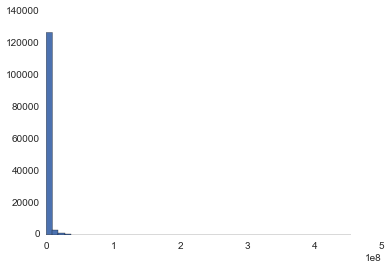

In [8]:
stock_df.Volume.hist(bins=50)
plt.show()

In [9]:
for i in xrange(len(stock_df.columns)):
    print i, stock_df.columns[i], stock_df.corr()['label'].values[i]

0 Open -0.0592818047289
1 High -0.0575142475735
2 Low -0.0613173520365
3 Close -0.0592486644931
4 Volume 0.00737461607854
5 50dravg -0.0559084871407
6 200dravg -0.0530666886678
7 OC% 0.00783466864888
8 HL% 0.142632220126
9 label 1.0


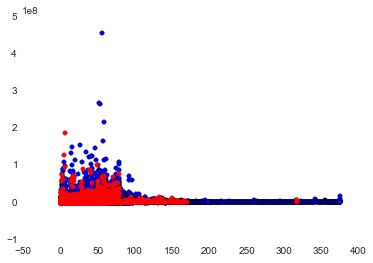

In [10]:
negative_df = stock_df[stock_df['label'] == 0]
positive_df = stock_df[stock_df['label'] == 1]

plt.scatter(negative_df['200dravg'], negative_df['Volume'])
plt.scatter(positive_df['200dravg'], positive_df['Volume'], color='r')
plt.show()

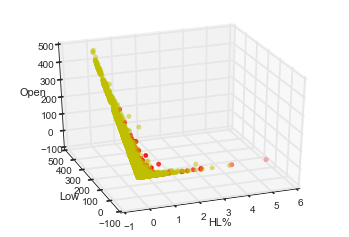

In [11]:
x, y, z = 'HL%', 'Low', 'Open'

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(negative_df[x], negative_df[y], negative_df[z], alpha=0.5, color='y')
ax.scatter(positive_df[x], positive_df[y], positive_df[z], color='r')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
ax.view_init(azim=250)
plt.show()

In [12]:
y = stock_df['label'].values
stock_df = stock_df.drop('label', axis=1)
X = stock_df.values

print X.shape, y.shape

(131977, 9) (131977,)


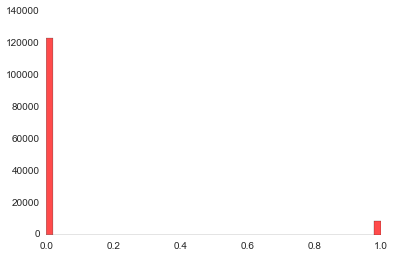

In [13]:
plt.hist(y, bins=50, alpha=0.7, color='r')
plt.show()

In [14]:
y_values = np.unique(y, return_counts=True)[0]
print y_values.shape, "\n"
print y_values

(2,) 

[0 1]


In [15]:
num_of_classes = np.unique(y, return_counts=True)[1]
print num_of_classes
print "percent 1: ", np.true_divide(num_of_classes[1],np.sum(num_of_classes))

[123412   8565]
percent 1:  0.064897671564


In [16]:
classes_to_remove = []
for i in np.where(num_of_classes == 1)[0]:
    classes_to_remove.append(y_values[i])

print len(classes_to_remove)
print classes_to_remove[:5]
print classes_to_remove[-5:]

0
[]
[]


In [17]:
print "number of labels: ", np.unique(y, return_counts=True)[0].shape[0]

number of labels:  2


In [18]:
#for i in xrange(X.shape[1]):
#    plt.scatter(X[:,i], y)
#    plt.show()

In [19]:
#for i in xrange(X.shape[1]):
#    plt.hist(X[:,i])
#    plt.show()

---

In [20]:
skb, learners = avg_clf_train.avg_clf_train(X, y, 4, 100.0, 0.1, stock_df)

'''
def avg_clf_train_func(X, y, k, stock_df): 

    clf_or_regr = "clf"

    t0 = time()


    ############################################################################ 

    pipeline = make_pipeline(DecisionTreeClassifier())

        # cross validation    
    cv = StratifiedShuffleSplit(y, test_size=0.2, random_state=42)

    # tune parameters
    params = dict()

    params['decisiontreeclassifier__criterion'] = ['gini', 'entropy']
    params['decisiontreeclassifier__max_features'] = ['auto', 'sqrt', 'log2', None]
    params['decisiontreeclassifier__class_weight'] = ['auto', None]
    params['decisiontreeclassifier__random_state'] = [42]

    grid_search = GridSearchCV(pipeline, param_grid=params, n_jobs=1, cv=cv)

    grid_search.fit(X, y)

    print grid_search.best_estimator_


    return skb, learners

skb, learners = avg_clf_train_func(X, y, 4, stock_df)
'''

k = 4
Open 352.91
High 329.83
Low 378.09
Close 350.87
Volume 4.79
50dravg 307.71
200dravg 279.47
OC% 12.71
HL% 2232.49

DecisionTreeClassifier(class_weight='auto', criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=42, splitter='best')
0.886194878012

confusion matrix:
     FALSE   TRUE
FALSE [23227  1443] 
TRUE  [1561  165]

             precision    recall  f1-score   support

          0       0.94      0.94      0.94     24670
          1       0.10      0.10      0.10      1726

avg / total       0.88      0.89      0.88     26396


minutes for learner to run: 0.011



'\ndef avg_clf_train_func(X, y, k, stock_df): \n\n    clf_or_regr = "clf"\n\n    t0 = time()\n\n\n    ############################################################################ \n\n    pipeline = make_pipeline(DecisionTreeClassifier())\n\n        # cross validation    \n    cv = StratifiedShuffleSplit(y, test_size=0.2, random_state=42)\n\n    # tune parameters\n    params = dict()\n\n    params[\'decisiontreeclassifier__criterion\'] = [\'gini\', \'entropy\']\n    params[\'decisiontreeclassifier__max_features\'] = [\'auto\', \'sqrt\', \'log2\', None]\n    params[\'decisiontreeclassifier__class_weight\'] = [\'auto\', None]\n    params[\'decisiontreeclassifier__random_state\'] = [42]\n\n    grid_search = GridSearchCV(pipeline, param_grid=params, n_jobs=1, cv=cv)\n\n    grid_search.fit(X, y)\n\n    print grid_search.best_estimator_\n\n\n    return skb, learners\n\nskb, learners = avg_clf_train_func(X, y, 4, stock_df)\n'

---

In [21]:
#X_df = pd.DataFrame(X[:,:4])
#X_df = pd.DataFrame(X)
#X_df['labels'] = y
#sns.pairplot(X_df, hue='labels')
#plt.show()

In [22]:
#plt.hist(y, color='b', alpha=0.7)
#plt.hist(y_pred, color='y', alpha=0.7)
#plt.show()

In [23]:
#plt.scatter(np.arange(y.shape[0]), y, color='b', alpha=0.7)
#plt.scatter(np.arange(y_pred.shape[0]), y_pred, color='y', alpha=0.7)
#plt.show()

In [24]:
#y_pred - y

In [25]:
#np.sum(y)

In [26]:
#error_count = 0
#for i in xrange(len(y)):
#    if y_pred[i] != y[i]:
#        error_count += 1
#        
#print error_count, " / ", len(y) 

---

In [27]:
pred_df = prediction_df[prediction_df['label'].apply(np.isnan) == True]

In [28]:
pred_tickers = pred_df['ticker'].unique()

In [29]:
pred_X = pred_df.drop(['ticker','label'], axis=1).values
print pred_X.shape
print pred_X[0]

(58, 9)
[  9.30000000e-01   9.50000000e-01   8.90000000e-01   9.20000000e-01
   1.23900000e+05   1.06900000e+00   8.92050000e-01  -1.07526882e-02
   6.74157303e-02]


In [30]:
pred_X = skb.transform(pred_X)
print pred_X.shape

(58, 4)


In [31]:
y_predictions = []
for learner in learners:
    y_pred = learner.predict(pred_X)
    print y_pred.shape
    y_predictions.append(y_pred)

(58,)


In [32]:
print len(y_predictions)
y_predictions = y_predictions[0]

1


In [33]:
#y_pred_avg = np.mean(y_predictions, axis=1)
#print y_pred_avg.shape

In [34]:
positive_tickers = []
for i in xrange(len(pred_tickers)):
    print i, pred_tickers[i], y_predictions[i]
    if y_predictions[i] == 1:
        positive_tickers.append(pred_tickers[i])

0 ABIO 0
1 ACOR 0
2 AERI 0
3 AFFX 0
4 AGEN 0
5 APPY 0
6 ARIA 0
7 ARNA 0
8 ARWR 0
9 AXDX 0
10 BABY 0
11 BCRX 0
12 BGMD 1
13 BIIB 0
14 BLUE 0
15 BRKR 0
16 CBPO 0
17 CGEN 0
18 CLDN 0
19 CLDX 0
20 COHR 0
21 CPHD 0
22 CPRX 0
23 CRIS 0
24 CYBX 0
25 CYNO 0
26 CYTR 0
27 DARA 0
28 DSCO 0
29 DYAX 1
30 ECYT 0
31 ENZN 0
32 ETRM 0
33 EXAS 0
34 EXEL 1
35 FATE 0
36 FEIC 0
37 FLDM 0
38 GILD 0
39 GNCA 0
40 HALO 0
41 IART 0
42 IDRA 0
43 IDXX 0
44 ILMN 0
45 IMMU 0
46 IMRS 0
47 INCY 0
48 INO 1
49 LPCN 0
50 MEIP 0
51 MNKD 0
52 OREX 0
53 PGNX 0
54 RMTI 0
55 SGYP 0
56 THLD 0
57 TNXP 0


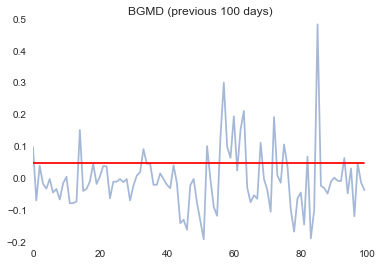

	BGMD 100-day freq probability: 0.17
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



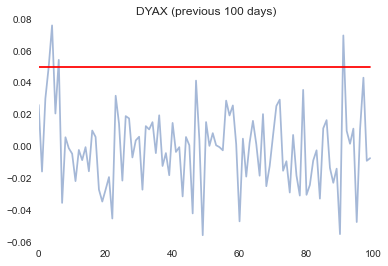

	DYAX 100-day freq probability: 0.04
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



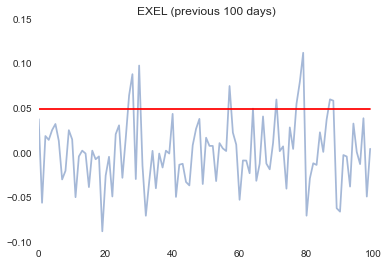

	EXEL 100-day freq probability: 0.11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



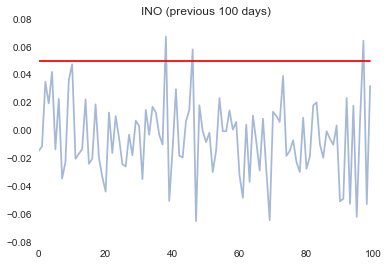

	INO 100-day freq probability: 0.03
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



In [35]:
for ticker in positive_tickers:
    
    past_days = 100
    
    oc = prediction_df[prediction_df['ticker'] == ticker]["OC%"][-past_days:]
    
    num_days = oc.shape[0]
    
    day_range = np.arange(num_days)
    
    plt.plot(day_range, oc, alpha=0.5)
    plt.plot(day_range, [0.05 for x in day_range], color='r')
    plt.title("{0} (previous {1} days)".format(ticker, num_days))
    plt.show()

    print "\t", ticker, "{}-day freq probability:".format(past_days), np.true_divide(np.sum(oc.values > 0.05), past_days)
    print "~"*50, "\n"  